In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
cols=['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']

In [ ]:
df=pd.read_csv("SeoulBikeData.csv",encoding_errors= 'replace')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df=df.drop(['Date','Holiday','Seasons'],axis=1)

In [ ]:
df.columns=cols

In [ ]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [ ]:
df.isnull().sum()

bike_count     0
hour           0
temp           0
humidity       0
wind           0
visibility     0
dew_pt_temp    0
radiation      0
rain           0
snow           0
functional     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bike_count   8760 non-null   int64  
 1   hour         8760 non-null   int64  
 2   temp         8760 non-null   float64
 3   humidity     8760 non-null   int64  
 4   wind         8760 non-null   float64
 5   visibility   8760 non-null   int64  
 6   dew_pt_temp  8760 non-null   float64
 7   radiation    8760 non-null   float64
 8   rain         8760 non-null   float64
 9   snow         8760 non-null   float64
 10  functional   8760 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


In [ ]:
#dateset_cols = ['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']
#df=df.drop(['Date','Holiday','Seasons'],axis=1)

In [ ]:
#df.columns = dateset_cols
df['functional'] = (df['functional']== 'Yes').astype(int)
df = df[df['hour']== 12]
df = df.drop(['hour'],axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


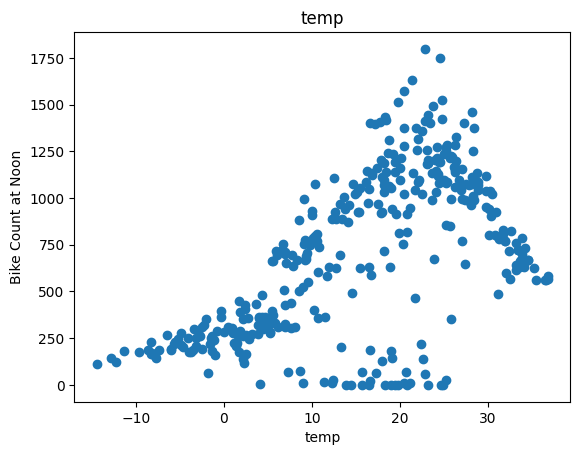

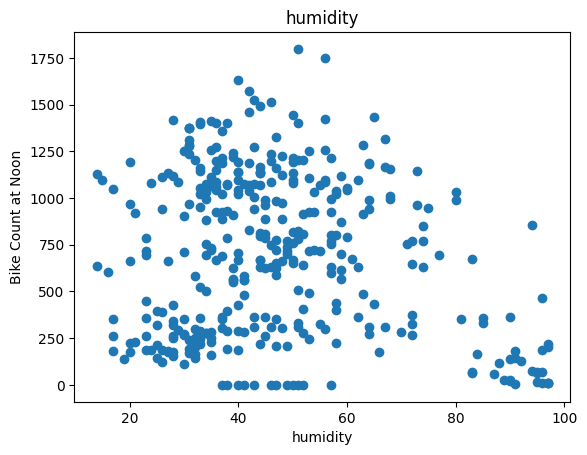

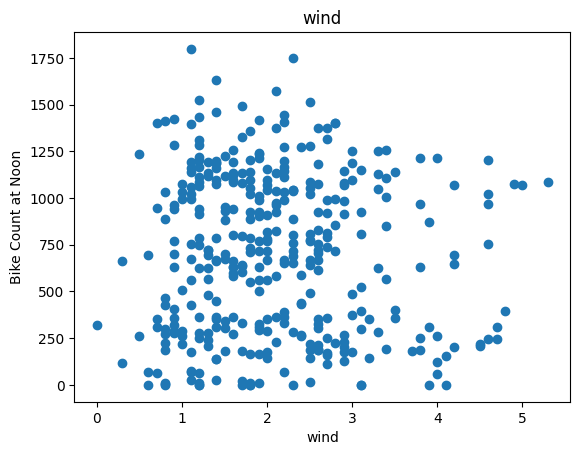

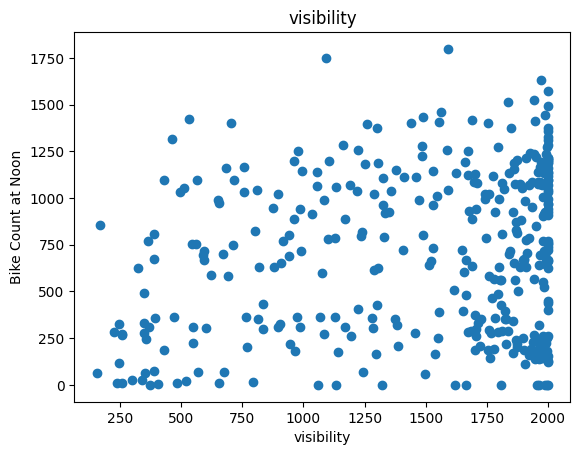

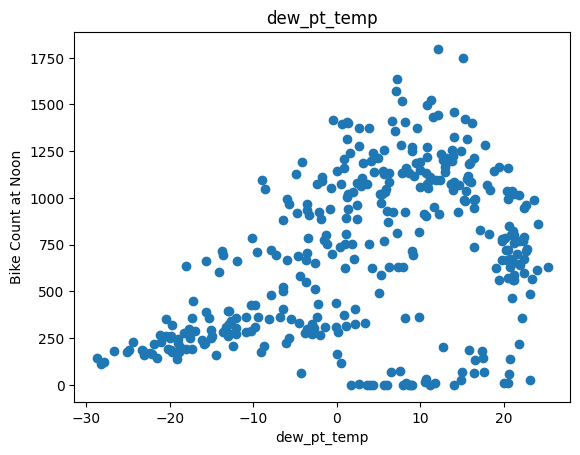

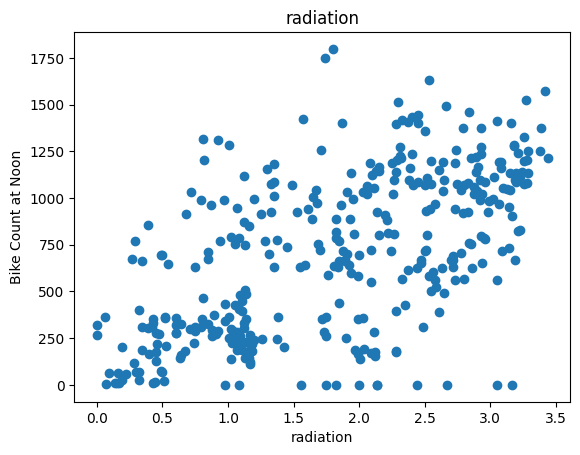

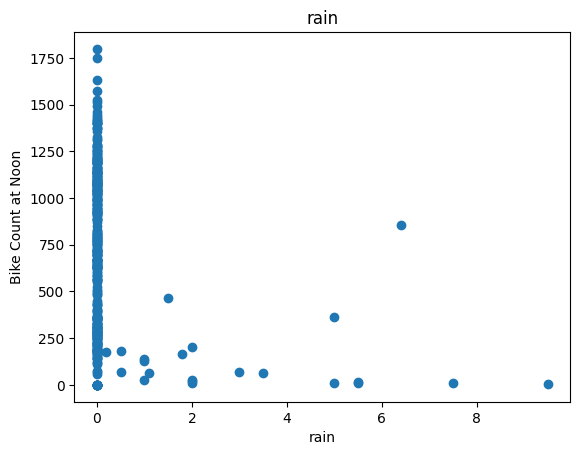

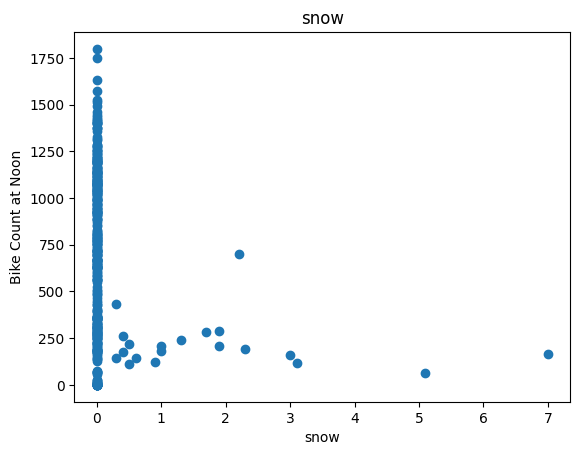

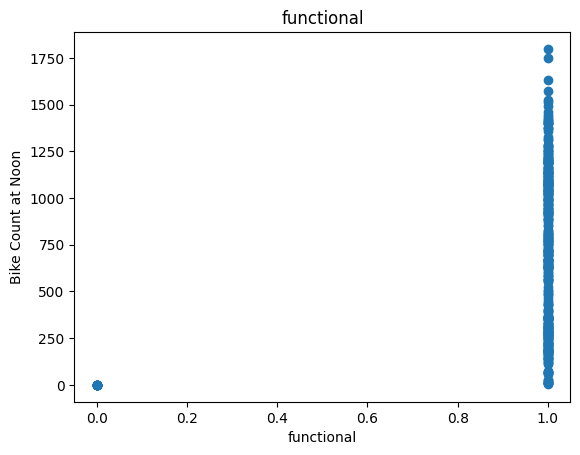

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label],df['bike_count'])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()


In [ ]:
for label in df.columns[1:]:
  print(df[label])

12      1.7
36      4.3
60      5.8
84     -0.3
108    -2.3
       ... 
8652    9.1
8676    9.3
8700    7.9
8724    5.6
8748    6.6
Name: temp, Length: 365, dtype: float64
12      23
36      41
60      85
84      38
108     25
        ..
8652    57
8676    61
8700    14
8724    27
8748    35
Name: humidity, Length: 365, dtype: int64
12      1.4
36      1.3
60      1.7
84      4.8
108     0.0
       ... 
8652    1.1
8676    1.5
8700    1.7
8724    0.3
8748    1.3
Name: wind, Length: 365, dtype: float64
12      2000
36      1666
60       349
84      1823
108     1962
        ... 
8652     562
8676     390
8700    1688
8724    1522
8748    1409
Name: visibility, Length: 365, dtype: int64
12     -17.2
36      -7.8
60       3.4
84     -12.9
108    -19.7
        ... 
8652     1.0
8676     2.1
8700   -18.0
8724   -11.9
8748    -7.8
Name: dew_pt_temp, Length: 365, dtype: float64
12      1.11
36      1.09
60      0.43
84      1.11
108     0.00
        ... 
8652    1.69
8676    0.85
8700    1.81

In [ ]:
df = df.drop(['wind','visibility','functional'],axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# train/test/valid

In [ ]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label ,x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X =dataframe[x_labels].values

  y= dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y

In [ ]:
_ , X_train_temp,y_train_temp =get_xy(train,'bike_count',x_labels=["temp"])
_ , X_val_temp,y_val_temp =get_xy(val,'bike_count',x_labels=["temp"])
_ , X_test_temp,y_test_temp =get_xy(test,'bike_count',x_labels=["temp"])

In [ ]:
#LinearRegression
temp_rg = LinearRegression()

In [ ]:
temp_rg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [ ]:
print(temp_rg.coef_,temp_rg.intercept_)

[[19.86486148]] [392.42730323]


In [ ]:
temp_rg.score(X_test_temp,y_test_temp)

0.3426346024399791

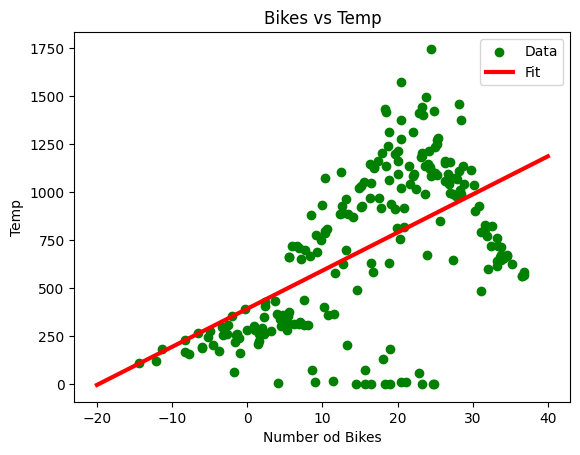

In [ ]:
plt.scatter(X_train_temp , y_train_temp , label="Data",color='green')
x = tf.linspace(-20,40,100)
plt.plot(x,temp_rg.predict(np.array(x).reshape(-1,1)), label="Fit",color='red',linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel('Number od Bikes')
plt.ylabel("Temp")
plt.show()

# Multiple Linear Regression

In [ ]:
_ , X_train_all,y_train_all =get_xy(train,'bike_count',x_labels=df.columns[1:])
_ , X_val_all,y_val_all =get_xy(val,'bike_count',x_labels=df.columns[1:])
_ , X_test_all,y_test_all =get_xy(test,'bike_count',x_labels=df.columns[1:])

In [ ]:
all_reg=LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_test_all,y_test_all)

0.47212782018086985

In [ ]:
y_pred=all_reg.predict(X_test_all)

# Regresssion with neural net

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label=';val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [ ]:
#Creating the model

In [ ]:
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [ ]:
history=temp_nn_model.fit(
    X_train_temp.reshape(-1),y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp,y_val_temp)
)

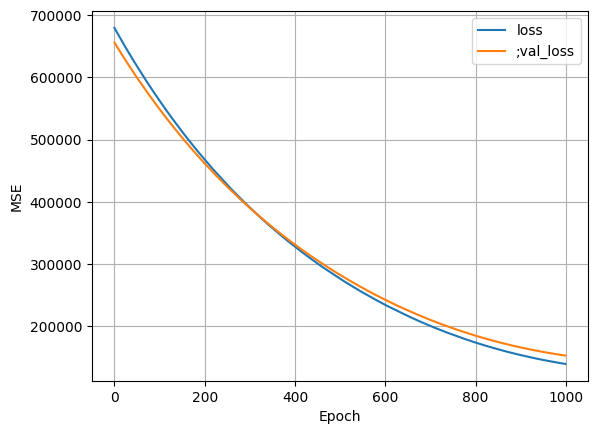

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


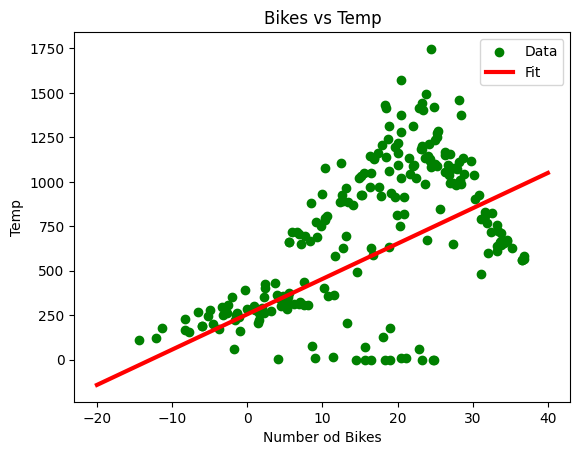

In [ ]:
plt.scatter(X_train_temp , y_train_temp , label="Data",color='green')
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit",color='red',linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel('Number od Bikes')
plt.ylabel("Temp")
plt.show()

# Neural Net

In [ ]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error")

In [ ]:
histroy= nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp , y_val_temp),
    verbose=0 , epochs=100
)

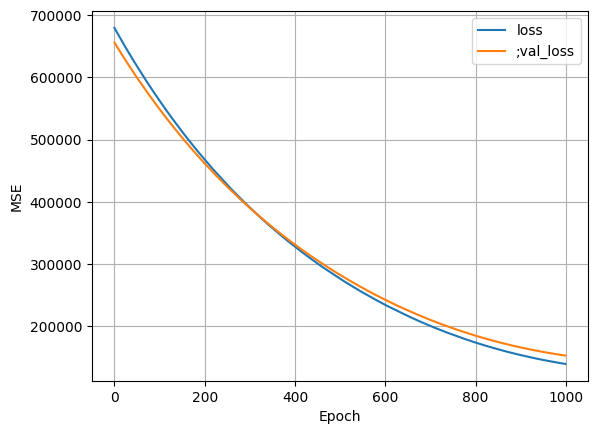

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


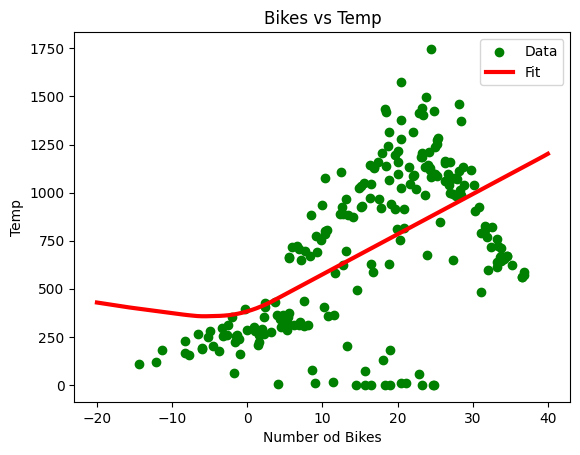

In [ ]:
plt.scatter(X_train_temp , y_train_temp , label="Data",color='green')
x = tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)), label="Fit",color='red',linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel('Number od Bikes')
plt.ylabel("Temp")
plt.show()

In [ ]:
all_normalizer=tf.keras.layers.Normalization(input_shape=(6,),axis=-1)
all_normalizer.adapt(X_train_all)


In [ ]:
nn_model=tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error")

In [ ]:
histroy= nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all , y_val_all),
    verbose=0 , epochs=100
)

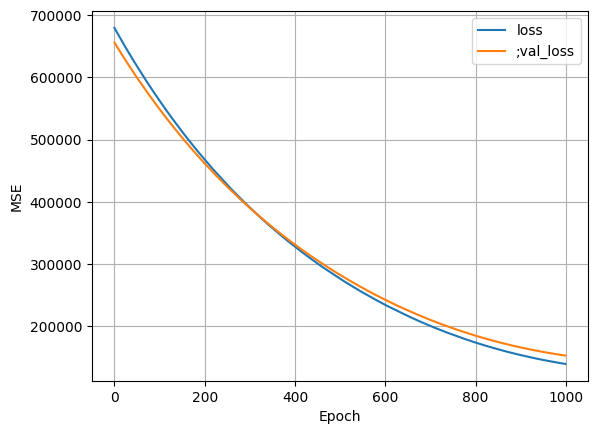

In [ ]:
plot_loss(history)

In [ ]:
#calculate the MSE for both linear regressior and nn

In [ ]:
y_pred_lr=all_reg.predict(X_test_all)
y_pred_nn=nn_model.predict(X_test_all)

3/3 [==============================] - 0s 2ms/step


In [ ]:
def MSE(y_pred,y_real):
  return (np.square(y_pred - y_real)).mean()

In [ ]:
MSE(y_pred_lr,y_test_all)

97488.15668723293

In [ ]:
MSE(y_pred_nn,y_test_all)

109926.38093421086

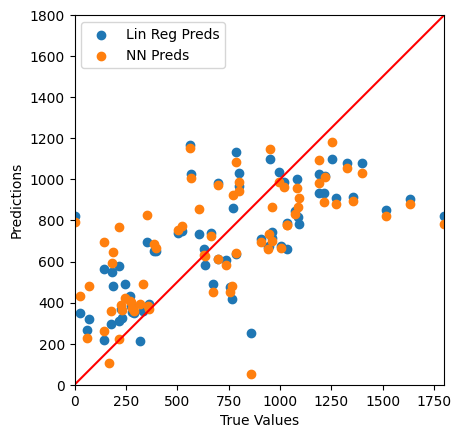

In [ ]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all,y_pred_lr,label="Lin Reg Preds")
plt.scatter(y_test_all,y_pred_nn,label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims=[0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims ,lims, c="red")